In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Data
from sklearn.datasets import load_breast_cancer
raw_data = load_breast_cancer()

In [3]:
cancer_data = pd.DataFrame(raw_data['data'], columns=raw_data['feature_names'])
cancer_data['target'] = raw_data['target']
cancer_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
# Test Train
X = cancer_data.drop('target', axis=1)
y = cancer_data['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
# Fit
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [32]:
def classifier_get_metrics(X, y, X_train, X_test, y_train, y_test, classifier, cv_folds = 5):
    from sklearn.model_selection import cross_val_score
    from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
    import matplotlib.pyplot as plt    
    
    print('Accuracy')
    print('-----------------------')
    print(f'Train Data Score: {classifier.score(X_train, y_train)*100:.2f}%')
    print(f'Test Data Score: {classifier.score(X_test, y_test)*100:.2f}%')

    print()
    print('Cross Validation Score')
    print('-----------------------')
    cvs = cross_val_score(classifier, X_test, y_test, cv=cv_folds)
    print(f'Cross Validation Score {cv_folds} folds Test Data (%): {list(np.round(cvs*100, 2))}')
    print(f'Cross Validation Score {cv_folds} folds Test Data mean: {cvs.mean()*100:.2f}%')

    print()
    print('ROC Curve and AUC - Test Data')
    print('-----------------------')
    y_preds = classifier.predict_proba(X_test)
    y_preds_positive = y_preds[:,1]
    print(f'Area Under Curve: {roc_auc_score(y_test, y_preds_positive)*100:.2f}')
    print()
    
    fpr, tpr, thresholds = roc_curve(y_test, y_preds_positive)
    plt.style.use('ggplot')
    fig, ax = plt.subplots(figsize=(6,3))
    ax.plot(fpr, tpr, label='ROC Curve')
    ax.plot([0,1], [0, 1], label='Guess', linestyle='-.')
    ax.set(title='ROC Curve', xlabel='False Positive Rate', ylabel='True Positive Rate')

    plt.legend()
    plt.show()    

    print()
    print('Confusion Matrix')
    print('-----------------------')
    y_preds = classifier.predict(X_test)
    confusion_m = confusion_matrix(y_test, y_preds)
    display(pd.crosstab(y_test, y_preds, rownames=['Actual Label'], colnames=['Predictions']))

Accuracy
-----------------------
Train Data Score: 100.00%
Test Data Score: 96.49%

Cross Validation Score
-----------------------
Cross Validation Score 10 folds Test Data (%): [91.67, 100.0, 100.0, 91.67, 81.82, 81.82, 100.0, 100.0, 100.0, 100.0]
Cross Validation Score 10 folds Test Data mean: 94.70%

ROC Curve and AUC - Test Data
-----------------------
Area Under Curve: 97.41



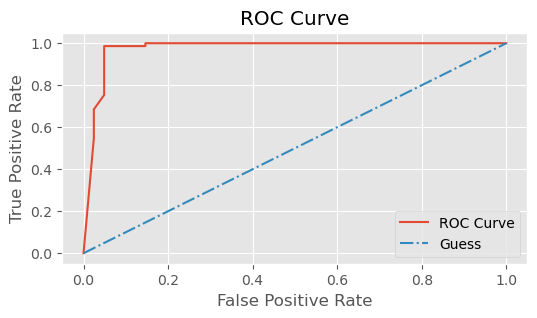


Confusion Matrix
-----------------------


Predictions,0,1
Actual Label,,
0,38,3
1,1,72


In [33]:
classifier_get_metrics(X, y, X_train, X_test, y_train, y_test, clf, 10)